In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Extract

In [2]:
dim_hospital = pd.read_csv(r'F:\Education\MySoft\mortytheplatypus\dataset\Health Dataset\dim_hospital.csv')

dim_hospital

,hospital_key,hospital_name,branch_name,hospital_type,email,website,address,geo_code,city,upazila,district,division
0,100001,BANGLADESH EYE HOSPITAL LTD.,Dhanmondi,Private,info@bdeyehospital.com,www.mysoftltd.com,"78, Satmasjid Road (Road#27), Dhanmondi,",302616,DHAKA,DHANMONDI,DHAKA,DHAKA
1,100002,BANGLADESH EYE HOSPITAL LTD(Mirpur),Mirpur,Private,info@bdeyehospital.com,www.mysoftltd.com,Mirpur,302648,DHAKA,MIRPUR,DHAKA,DHAKA
2,100003,BANGLADESH EYE HOSPITAL LTD(Uttara),Uttara,Private,info@bdeyehospital.com,www.mysoftltd.com,Uttara,302694,DHAKA,UTTARA PASCHIM,DHAKA,DHAKA


In [3]:
dim_geography = pd.read_csv(r'F:\Education\MySoft\mortytheplatypus\dataset\Health Dataset\dim_geography.csv')

dim_geography

,geo_key,upazila,district,division
0,603602,AJMIRIGANJ,HABIGANJ,SYLHET
1,603605,BAHUBAL,HABIGANJ,SYLHET
2,603611,BANIACHONG,HABIGANJ,SYLHET
3,603626,CHUNARUGHAT,HABIGANJ,SYLHET
4,603644,HABIGANJ SADAR,HABIGANJ,SYLHET
...,...,...,...,...
551,107958,MATHBARIA,PIROJPUR,BARISAL
552,107976,NAZIRPUR,PIROJPUR,BARISAL
553,107980,PIROJPUR SADAR,PIROJPUR,BARISAL
554,107987,NESARABAD (SWARUPKATI),PIROJPUR,BARISAL


In [4]:
dim_lab = pd.read_csv(r'F:\Education\MySoft\mortytheplatypus\dataset\Health Dataset\dim_lab.csv')

dim_lab

,lab_key,lab_name,lab_type,lab_code,lab_desc
0,10001,ADMINISTRATION,1,679,DESC
1,10002,Urology,1,0037,DESC
2,10003,Serology,1,0008,DESC
3,10004,AMBULANCE SERVICE,1,0057,DESC
4,10005,USG,1,0012,DESC
...,...,...,...,...,...
236,10237,Nursing Service (Technical),1,BSH096,DESC
237,10238,MEDICINE,1,MED1,DESC
238,10239,OPD DOCTOR,1,D002,DESC
239,10240,Maha,1,Maha01,DESC


In [5]:
dim_test = pd.read_csv(r'F:\Education\MySoft\mortytheplatypus\dataset\Health Dataset\dim_test.csv')

dim_test

,test_key,test_name,test_code,specimen,ct_ref,test_desc
0,10002,Pus for Fungus,1988,PUS,BSH,Desc
1,10003,Drain Fluid for Bilirubin,00885,FLUID,BSH,Desc
2,10004,NASAL SWAB FOR KLB,0705,Not Found,BSH,Desc
3,10005,X-Pert MTB/RIF assay by archived gastric Aspi...,0706,TRACHEAL ASPIRATE,BSH,Desc
4,10006,Anti-Filaria Ab IgG4,0192,BLOOD,BSH,Desc
...,...,...,...,...,...,...
1130,10011,Pleural Fluid for Malignant Cell,1486,PLEURAL FLUID,BSH,A malignant pleural effusion (MPE) is the buil...
1131,10693,FBG - Fasting blood glucose,0031,BLOOD,SNOMED CT,Desc
1132,10453,RBG - Random blood glucose,0030,BLOOD,SNOMED CT,Desc
1133,10259,Blood calcium level,0237,BLOOD,SNOMED CT,Desc


In [6]:
dim_time = pd.read_csv(r'F:\Education\MySoft\mortytheplatypus\dataset\Health Dataset\dim_time.csv')

dim_time

,time_key,date_time,year,month,day,yyyymm,yyyymmdd,quarter
0,20190907,2019-09-07,2019,9,7,201909,20190907,Q3
1,20190908,2019-09-08,2019,9,8,201909,20190908,Q3
2,20190909,2019-09-09,2019,9,9,201909,20190909,Q3
3,20190911,2019-09-11,2019,9,11,201909,20190911,Q3
4,20190912,2019-09-12,2019,9,12,201909,20190912,Q3
...,...,...,...,...,...,...,...,...
555,20190318,2019-03-18,2019,3,18,201903,20190318,Q1
556,20190319,2019-03-19,2019,3,19,201903,20190319,Q1
557,20190317,2019-03-17,2019,3,17,201903,20190317,Q1
558,20190320,2019-03-20,2019,3,20,201903,20190320,Q1


In [7]:
fact_sales = pd.read_csv(r'F:\Education\MySoft\mortytheplatypus\dataset\Health Dataset\fact_sales.csv')

fact_sales

,_id,pik,time_key,geo_key,hospital_key,lab_key,test_key,sales_price
0,1,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10003,10490,1030
1,2,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10043,10156,1210
2,3,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10043,10257,430
3,4,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10043,10822,1210
4,5,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10043,10899,480
...,...,...,...,...,...,...,...,...
92078,92079,M2018xvncrvcrnouoosrrvvn,20200301,302650,100001,10051,10531,1100
92079,92080,M2018xvncrvcrnouoosrrvvn,20200301,302650,100001,10053,10157,850
92080,92081,M2018xvncrvcrnouoosrrvvn,20200301,302650,100001,10058,10617,310
92081,92082,M2018xwrrefhpplrnounruupuws,20190911,207585,100001,10048,10655,400


# Transform

In [20]:
# dim_geography.dtypes
# dim_hospital.dtypes
# dim_lab.dtypes
# dim_test.dtypes
# dim_time.dtypes
fact_sales.dtypes

_id              int64
pik             object
time_key         int64
geo_key          int64
hospital_key     int64
lab_key          int64
test_key         int64
sales_price      int64
dtype: object

In [19]:
dim_time['date_time'] = dim_time['date_time'].astype('datetime64[ns]')

dim_time.dtypes

time_key              int64
date_time    datetime64[ns]
year                  int64
month                 int64
day                   int64
yyyymm                int64
yyyymmdd              int64
quarter              object
dtype: object

In [22]:
fact_sales['sales_price'] = fact_sales['sales_price'].astype('float64')

fact_sales.dtypes

_id               int64
pik              object
time_key          int64
geo_key           int64
hospital_key      int64
lab_key           int64
test_key          int64
sales_price     float64
dtype: object

# Load

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="healthdata",
                                           user = "postgres",
                                           password = "password",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Successfully connected to database (hda)")
        return self.connection
    
con = PostgresConnection().getConnection()

Successfully connected to database (hda)


In [24]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO hda_star_schema.dim_geography(geo_key, upazila, district, division) " \
                "VALUES (%s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, dim_geography.values)
con.commit()
cur.close()

Successfully connected to database (hda)


In [26]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO hda_star_schema.dim_hospital(hospital_key, hospital_name, " \
                "branch_name, hospital_type, email, website, address, geo_code, city, upazila, district, division) " \
                "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, dim_hospital.values)
con.commit()
cur.close()

Successfully connected to database (hda)


In [27]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO hda_star_schema.dim_lab(lab_key, lab_name, lab_type, lab_code, lab_desc) " \
                "VALUES (%s, %s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, dim_lab.values)
con.commit()
cur.close()

Successfully connected to database (hda)


In [35]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO hda_star_schema.dim_test(test_key, test_name, test_code, specimen, ct_ref, test_desc) " \
                "VALUES (%s, %s, %s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, dim_test.values)
con.commit()
cur.close()

Successfully connected to database (hda)


In [31]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO hda_star_schema.dim_time(time_key, date_time, year, month, day, yyyymm, yyyymmdd, quarter) " \
                "VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, dim_time.values)
con.commit()
cur.close()

Successfully connected to database (hda)


In [40]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO hda_star_schema.fact_sales(_id, pik, time_key, geo_key, hospital_key, lab_key, test_key, sales_price) " \
                "VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, fact_sales.values)
con.commit()
cur.close()

Successfully connected to database (hda)


# Queries

# i. For each lab, the top 3 tests performed by that lab, by sales.  

In [53]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT dl.lab_key as lab_key, dt.test_name as test_name, SUM(fs.sales_price) as sales " \
                "FROM hda_star_schema.fact_sales fs " \
                "JOIN hda_star_schema.dim_lab dl ON dl.lab_key = fs.lab_key "\
                "JOIN hda_star_schema.dim_test dt ON dt.test_key = fs.test_key "\
                "GROUP BY CUBE (dl.lab_key, dt.test_name)" \
                "ORDER BY dl.lab_key, sales DESC"
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['lab', 'test', 'sales'])
df = df.dropna()
df = df.groupby('lab').head(3)
df = df.head(24)
df

Successfully connected to database (hda)


,lab,test,sales
1,10003,Prothrombin Time (PT),732920.0
2,10003,APTT,535600.0
3,10003,Anti-CCP Antibody (ELISA),495900.0
42,10031,PGx of Clopidogrel,4400.0
43,10031,PGx Aspirin Test,3520.0
45,10043,Electrolytes Serum,7146260.0
46,10043,Serum creatinine level,3654240.0
47,10043,HbA1c,3230040.0
178,10048,CBC,5521200.0
179,10048,Blood Film (PBF),545400.0


<Axes: title={'center': 'Lab-wise top 3 tests by sales'}, xlabel='lab', ylabel='sales'>

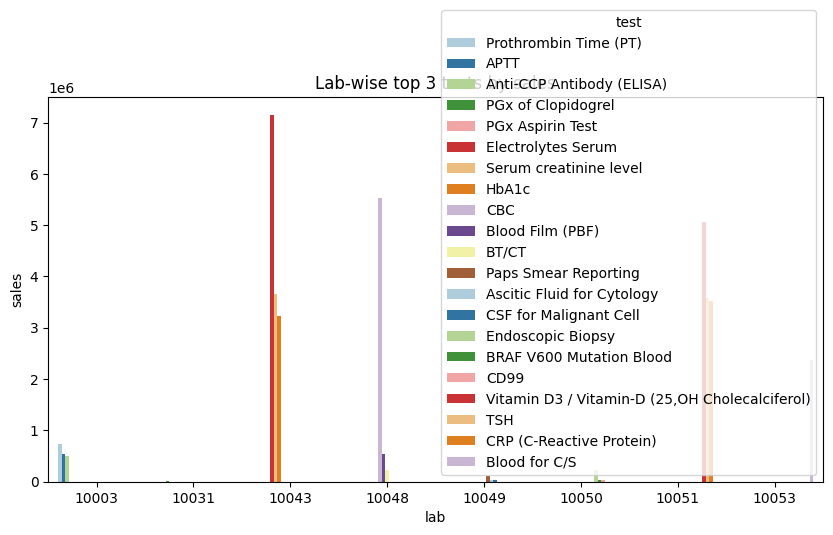

In [13]:
dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
plt.xlabel('Lab Key')
plt.ylabel('Sales')
plt.title('Lab-wise top 3 tests by sales')
sns.barplot(x = df['lab'], y=df['sales'], hue=df['test'], ax=ax, palette='Paired')

# Division-wise yearly customer count 

In [75]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT dg.division, dt.year, COUNT(fs.pik) as customer_count "\
                "FROM hda_star_schema.fact_sales fs "\
                "JOIN hda_star_schema.dim_time dt ON dt.time_key = fs.time_key "\
                "JOIN hda_star_schema.dim_geography dg ON dg.geo_key = fs.geo_key " \
                "GROUP BY CUBE(dg.division, dt.year) "\
                "ORDER BY dg.division, dt.year "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['division', 'year', 'customer_count'])
df = df.dropna()
df

Successfully connected to database (hda)


,division,year,customer_count
0,BARISAL,2018,232
1,BARISAL,2019,2730
2,BARISAL,2020,822
4,CHITTAGONG,2018,808
5,CHITTAGONG,2019,7782
6,CHITTAGONG,2020,2013
8,DHAKA,2018,4535
9,DHAKA,2019,42768
10,DHAKA,2020,10387
12,KHULNA,2018,298


<Axes: title={'center': 'Division-wise yearly sales'}, xlabel='division', ylabel='customer_count'>

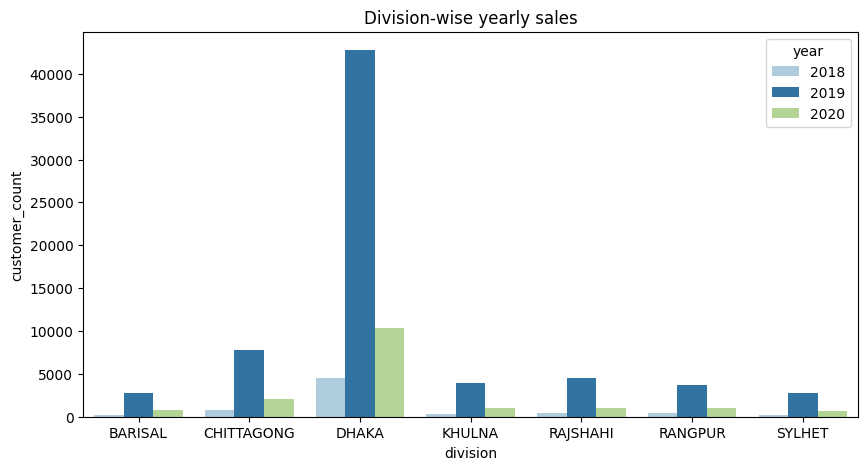

In [77]:
dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
plt.xlabel('Division')
plt.ylabel('Customer Count')
plt.title('Division-wise yearly sales')
sns.barplot(x = df['division'], y=df['customer_count'], hue=df['year'], ax=ax, palette='Paired')

# ii. Total money spent in each division yearly.


In [18]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT dg.division, dt.year, SUM(fs.sales_price) as sales "\
                "FROM hda_star_schema.fact_sales fs "\
                "JOIN hda_star_schema.dim_time dt ON dt.time_key = fs.time_key "\
                "JOIN hda_star_schema.dim_geography dg ON dg.geo_key = fs.geo_key " \
                "GROUP BY CUBE(dg.division, dt.year) "\
                "ORDER BY dg.division, dt.year "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['division', 'year', 'sales'])
df = df.dropna()
df

Successfully connected to database (hda)


,division,year,sales
0,BARISAL,2018,210060.0
1,BARISAL,2019,2421840.0
2,BARISAL,2020,798230.0
4,CHITTAGONG,2018,803950.0
5,CHITTAGONG,2019,6900320.0
6,CHITTAGONG,2020,1964930.0
8,DHAKA,2018,4433780.0
9,DHAKA,2019,40506520.0
10,DHAKA,2020,10625510.0
12,KHULNA,2018,287270.0


<Axes: title={'center': 'Division-wise yearly sales'}, xlabel='division', ylabel='sales'>

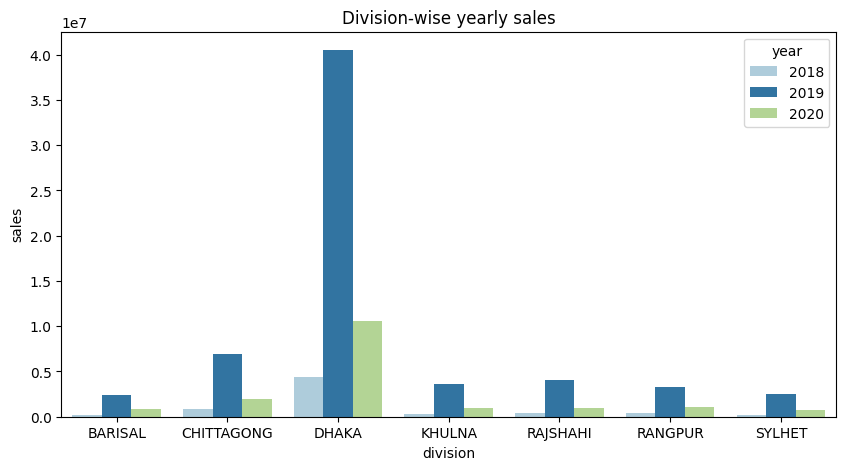

In [19]:
dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
plt.xlabel('Division')
plt.ylabel('Sales')
plt.title('Division-wise yearly sales')
sns.barplot(x = df['division'], y=df['sales'], hue=df['year'], ax=ax, palette='Paired')

# iii. Top 5 tests by year 

In [67]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT dtm.year, dt.test_name as test_name, COUNT(fs.test_key) as count " \
                "FROM hda_star_schema.fact_sales fs " \
                "JOIN hda_star_schema.dim_time dtm ON dtm.time_key = fs.time_key "\
                "JOIN hda_star_schema.dim_test dt ON dt.test_key = fs.test_key "\
                "GROUP BY CUBE (dtm.year, dt.test_name)" \
                "ORDER BY dtm.year, count DESC"
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['year', 'test', 'count'])
df = df.dropna()
df = df.groupby('year').head(5)
# df = df.head(24)
df

Successfully connected to database (hda)


,year,test,count
1,2018,CBC,992
2,2018,Serum creatinine level,606
3,2018,Electrolytes Serum,536
4,2018,ALT(SGPT) Serum,330
5,2018,Urine R/M/E,280
281,2019,CBC,10329
282,2019,Serum creatinine level,5588
283,2019,Electrolytes Serum,4314
284,2019,ALT(SGPT) Serum,3052
285,2019,Complete Urine Analysis (Urine R/E),2844


<Axes: title={'center': 'Yearly top 5 sales'}, xlabel='year', ylabel='count'>

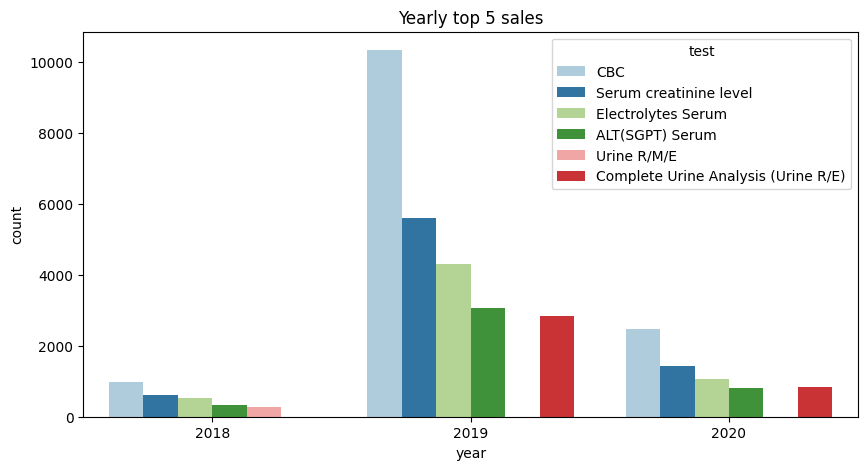

In [69]:
dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Yearly top 5 sales')
sns.barplot(x = df['year'], y=df['count'], hue=df['test'], ax=ax, palette='Paired')

# iv. Month-wise top 3 tests performed

In [72]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT dtm.month, dt.test_name as test_name, COUNT(fs.test_key) as count " \
                "FROM hda_star_schema.fact_sales fs " \
                "JOIN hda_star_schema.dim_time dtm ON dtm.time_key = fs.time_key "\
                "JOIN hda_star_schema.dim_test dt ON dt.test_key = fs.test_key "\
                "GROUP BY CUBE (dtm.month, dt.test_name)" \
                "ORDER BY dtm.month, count DESC"
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['month', 'test', 'count'])
df = df.dropna()
df = df.groupby('month').head(3)
# df = df.head(24)
df

Successfully connected to database (hda)


,month,test,count
1,1,CBC,1490
2,1,Serum creatinine level,988
3,1,Electrolytes Serum,716
271,2,CBC,1458
272,2,Serum creatinine level,924
273,2,Electrolytes Serum,712
547,3,CBC,1406
548,3,Serum creatinine level,883
549,3,Electrolytes Serum,658
802,4,CBC,1088


<Axes: title={'center': 'Monthly top 3 tests'}, xlabel='month', ylabel='count'>

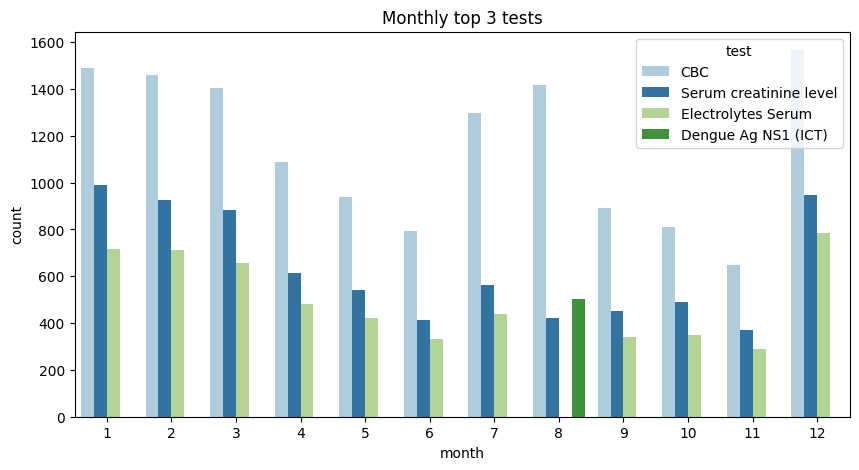

In [73]:
dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly top 3 tests')
sns.barplot(x = df['month'], y=df['count'], hue=df['test'], ax=ax, palette='Paired')